In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.optimize as opt
import scipy.signal as scisig
import analysis_utils as au
import importlib
import h5py

In [ ]:
filename = 'D:/Lab Data/lorentz_force/sphere20250423_2/20250425/Background/tt0.hdf5'

['data']


In [27]:
def load_data_hdf5(filename):
    """
    Loads data in HDF5. Doesn't load metadata. Outputs as dictionary.
    filename: Filename of file you want to load
    """
    f = h5py.File(filename, "r")
    data = np.array(f['data']['channel_d'])*f['data']['channel_d'].attrs['adc2mv']/1000
    dt = f['data'].attrs['delta_t']
    f.close()
    return data, dt

In [28]:
data, dt = load_data_hdf5(filename)

In [36]:
PSD = scisig.welch(data, fs=1/dt, nperseg=int(0.1/dt))

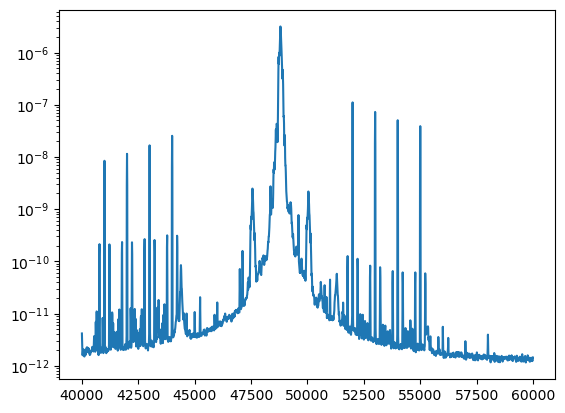

In [38]:
lb = 4000
ub = 6000
plt.plot(PSD[0][lb:ub], PSD[1][lb:ub])
plt.yscale('log')


In [115]:
# start with something simple

freqs = [4100, 4200, 4300, 4400, 5200, 5300, 5400, 5500]

combs = np.zeros((8, 1000))
cf = np.zeros((1000))
cf_amps = np.zeros((1000))
for i in range(0, 100):
    filename = 'D:/Lab Data/lorentz_force/sphere20250423_2/20250425/Background/tt' + str(i) + '.hdf5'
    data, dt = load_data_hdf5(filename)

    for j in range(0, 10):
        PSD = scisig.welch(data[j*10**6:(j+1)*10**6], fs=1/dt, nperseg=int(0.1/dt))
        for n, freq in enumerate(freqs):
            combs[n, i*10+j] = PSD[1][freq]
        cf[i*10+j] = np.argmax(PSD[1][4000:6000])
        cf_amps[i*10+j] = np.max(PSD[1][4000:6000])

In [131]:
cf_amps_f = au.butter_lowpass_filter(cf_amps, 0.1, fs = 10, order=1)

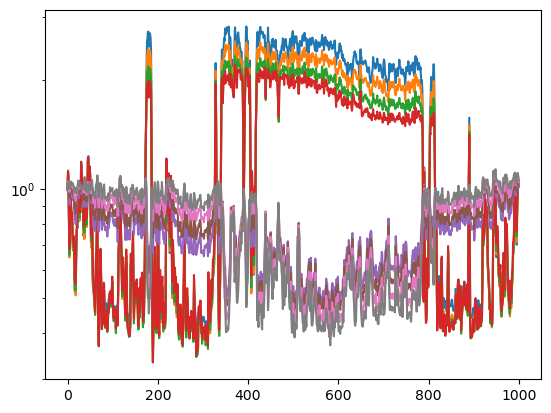

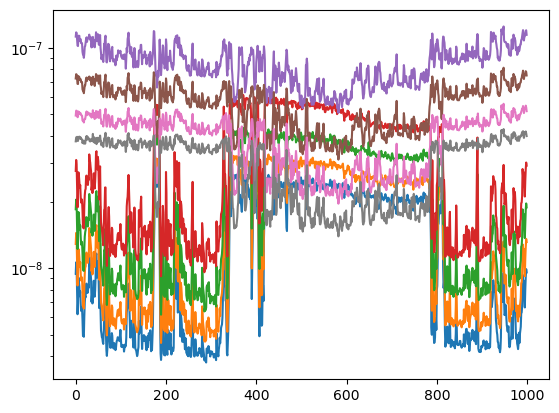

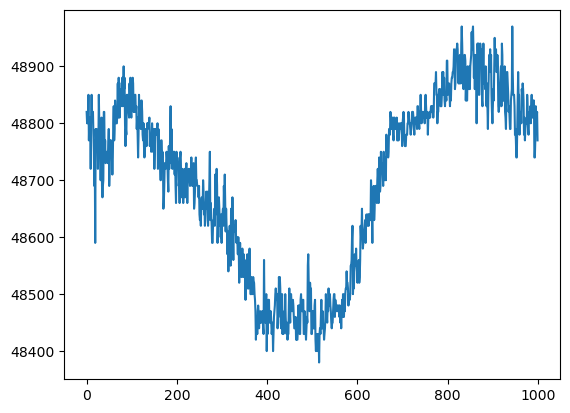

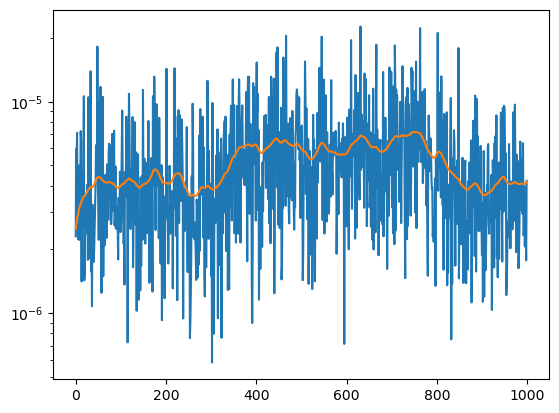

In [132]:
for i in range(0, 8):
    plt.plot(combs[i]/combs[i, 0], label=str(freqs[i]) + ' Hz')
plt.yscale('log')
plt.figure()
for i in range(0, 8):
    plt.plot(combs[i], label=str(freqs[i]) + ' Hz')
plt.yscale('log')
plt.figure()
plt.plot((cf+4000)*10)
plt.figure()
plt.plot(cf_amps)

plt.plot(cf_amps_f)
plt.yscale('log')

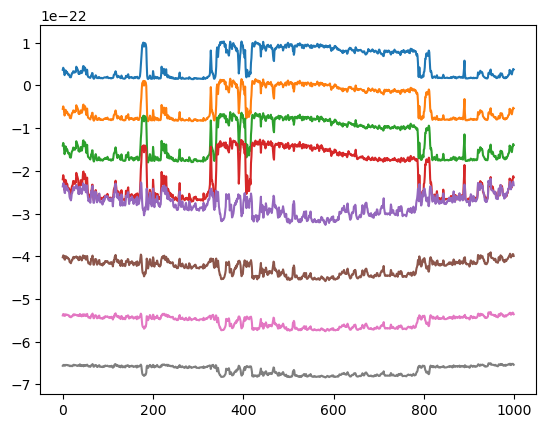

In [101]:
for i in range(0, 8):
    plt.plot(combs[i]/(freqs[i]**2 - cf**2)**2-i*10**(-22), label=str(freqs[i]) + ' Hz')
#plt.yscale('log')

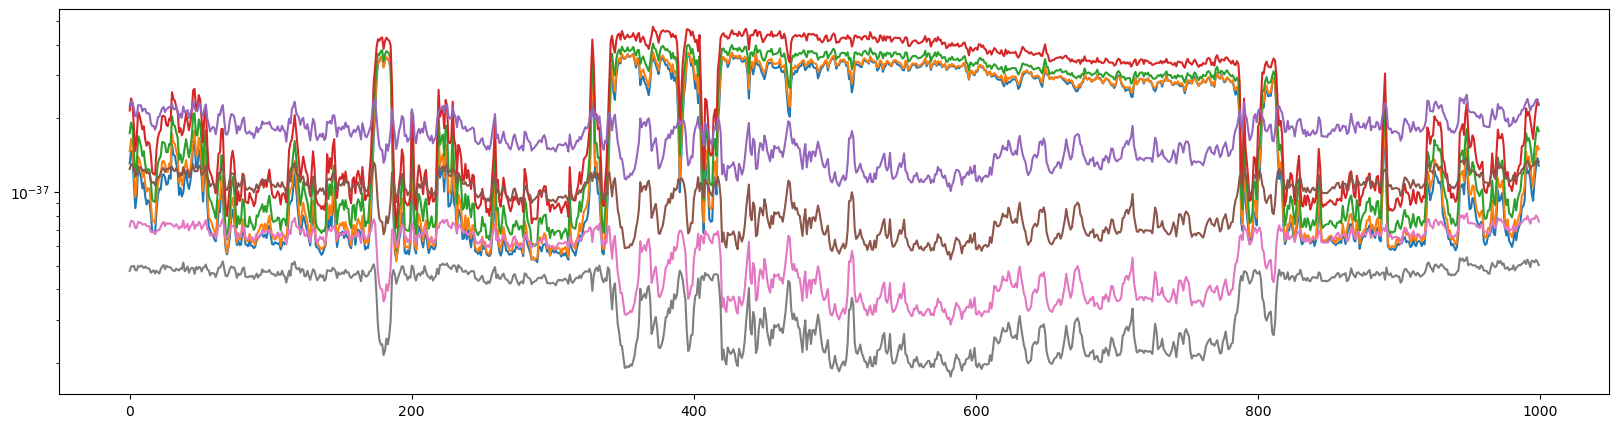

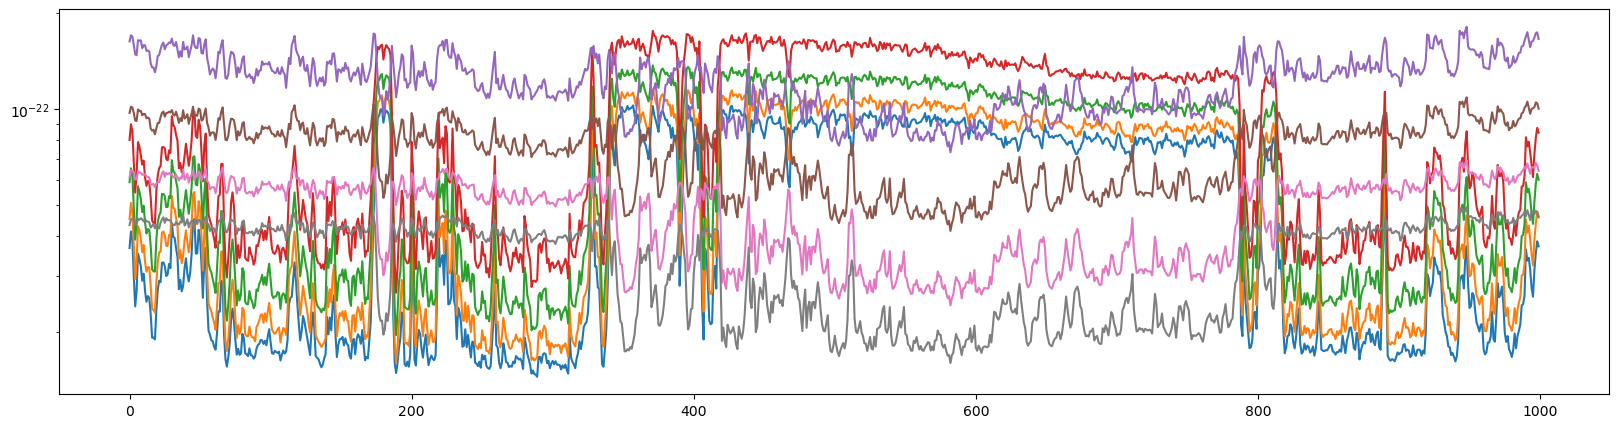

In [102]:
plt.figure(figsize = (20, 5))
for i in range(0, 8):
    plt.plot(combs[i]/((freqs[i]**2 - cf**2)**2)/((freqs[i]**2 - 215**2)**2))
plt.yscale('log')
plt.figure(figsize = (20, 5))
for i in range(0, 8):
    plt.plot(combs[i]/((freqs[i]**2 - cf**2)**2))
plt.yscale('log')

In [140]:

D_mean = []
for i in range(0, 100):
    filename = 'D:/Lab Data/lorentz_force/sphere20250423_2/20250425/Background/tt' + str(i) + '.hdf5'
    data, dt = load_data_hdf5(filename)
    D_mean.append(np.mean(data))

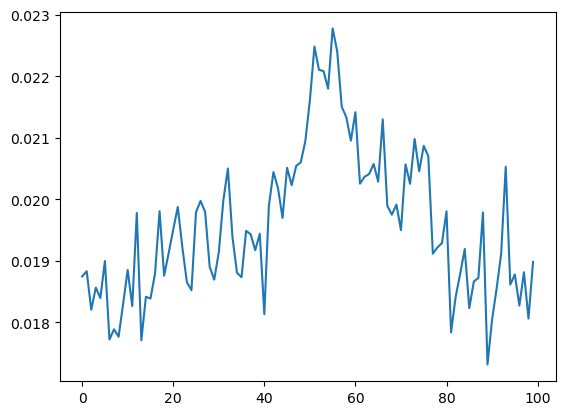

In [141]:
plt.plot(D_mean)

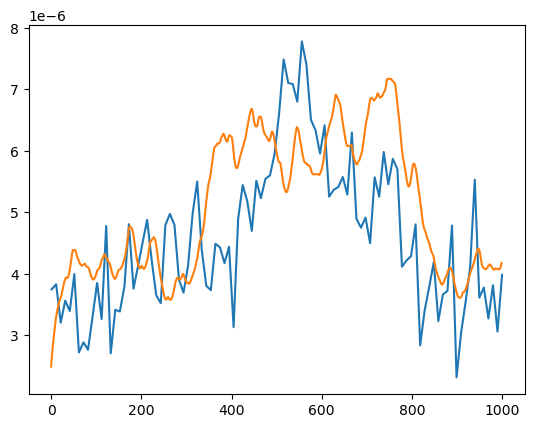

In [150]:
plt.plot(np.linspace(1, 1000, 100), np.array(D_mean)/10**3-1.5e-5)
plt.plot(cf_amps_f)

In [133]:
filename = 'D:/Lab Data/lorentz_force/sphere20250423_2/20250425/Background/tt0.hdf5'
data1, dt = load_data_hdf5(filename)
PSD1 = scisig.welch(data1, fs=1/dt, nperseg=int(0.1/dt))
filename = 'D:/Lab Data/lorentz_force/sphere20250423_2/20250425/Background/tt18.hdf5'
data2, dt = load_data_hdf5(filename)
PSD2 = scisig.welch(data2, fs=1/dt, nperseg=int(0.1/dt))
filename = 'D:/Lab Data/lorentz_force/sphere20250423_2/20250425/Background/tt50.hdf5'
data3, dt = load_data_hdf5(filename)
PSD3 = scisig.welch(data3, fs=1/dt, nperseg=int(0.1/dt))
filename = 'D:/Lab Data/lorentz_force/sphere20250423_2/20250425/Background/tt90.hdf5'
data4, dt = load_data_hdf5(filename)
PSD4 = scisig.welch(data4, fs=1/dt, nperseg=int(0.1/dt))

In [139]:
print(np.mean(data1))
print(np.mean(data2))
print(np.mean(data3))
print(np.mean(data4))

0.01874587484664447
0.018758143552964866
0.021604902169866016
0.018041427881710245


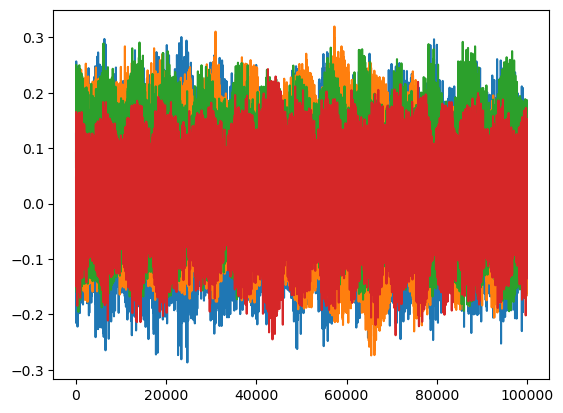

In [137]:
plt.plot(data1[::100])
plt.plot(data2[::100])

plt.plot(data3[::100])


plt.plot(data4[::100])

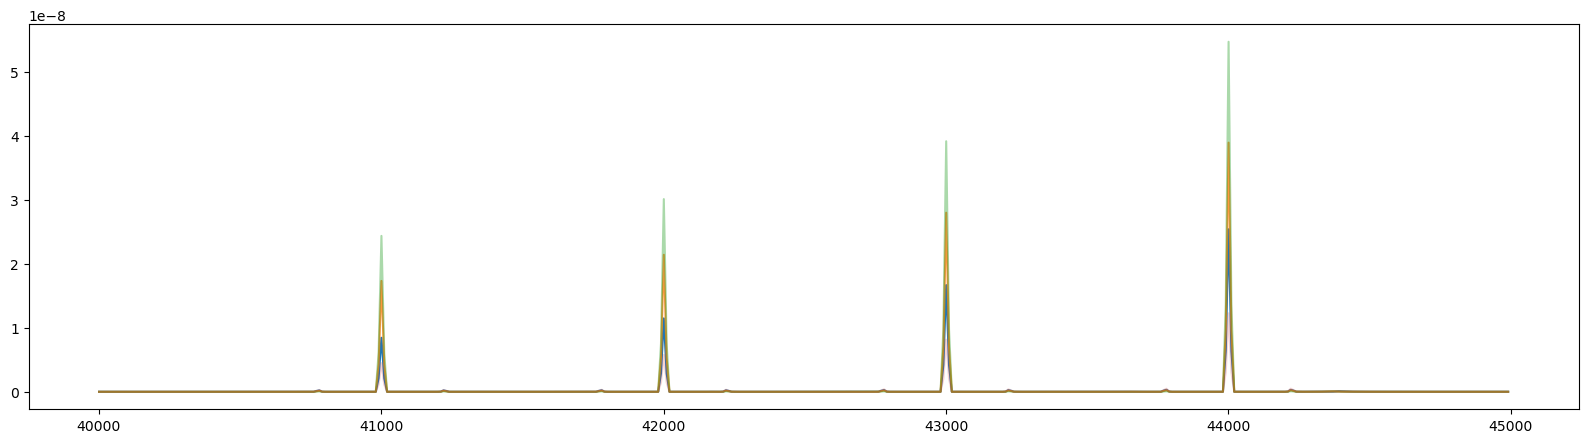

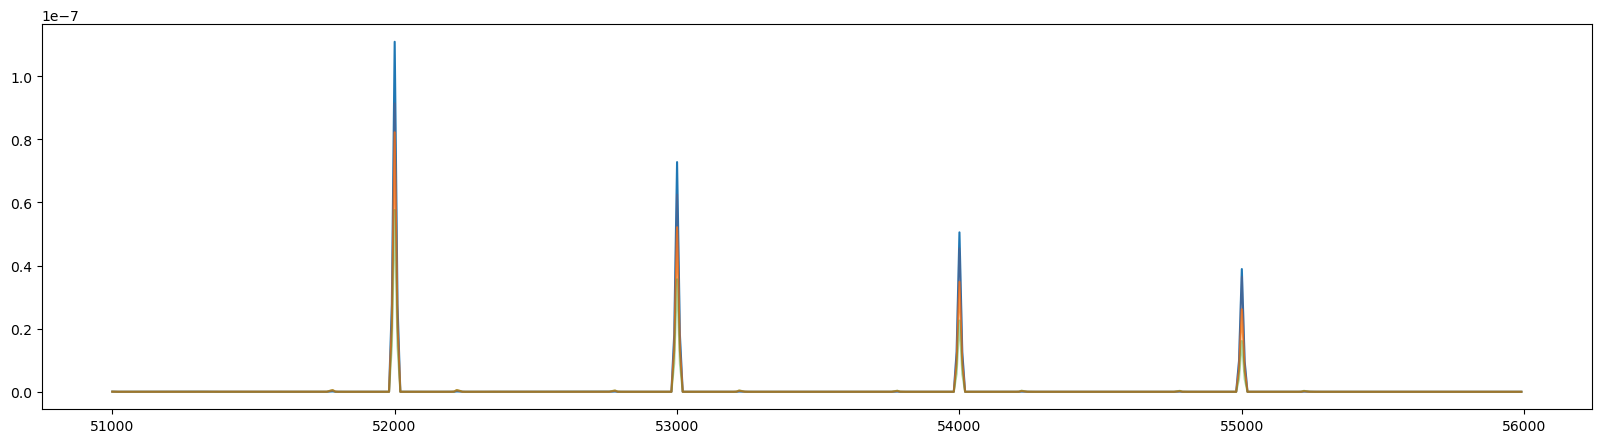

In [114]:
lb = 4000
ub = 4500
plt.figure(figsize = (20, 5))
plt.plot(PSD1[0][lb:ub], PSD1[1][lb:ub])
plt.plot(PSD2[0][lb:ub], PSD2[1][lb:ub], alpha = 0.8)
plt.plot(PSD3[0][lb:ub], PSD3[1][lb:ub], alpha = 0.4)
plt.plot(PSD4[0][lb:ub], PSD4[1][lb:ub], alpha = 0.2)
#plt.yscale('log')
lb = 5100
ub = 5600
plt.figure(figsize = (20, 5))
plt.plot(PSD1[0][lb:ub], PSD1[1][lb:ub])
plt.plot(PSD2[0][lb:ub], PSD2[1][lb:ub], alpha = 0.8)
plt.plot(PSD3[0][lb:ub], PSD3[1][lb:ub], alpha = 0.4)
plt.plot(PSD4[0][lb:ub], PSD4[1][lb:ub], alpha = 0.2)
#plt.yscale('log')


In [151]:
filename = 'D:/Lab Data/lorentz_force/sphere20250423_2/20250425/Background/tt0.hdf5'
data1, dt = load_data_hdf5(filename)
PSD1 = scisig.welch(data1, fs=1/dt, nperseg=int(0.1/dt))
filename = 'D:/Lab Data/lorentz_force/sphere20250423_2/20250425/Magnet 1/tt0.hdf5'
data2, dt = load_data_hdf5(filename)
PSD2 = scisig.welch(data2, fs=1/dt, nperseg=int(0.1/dt))
filename = 'D:/Lab Data/lorentz_force/sphere20250423_2/20250425/Magnet 2/tt50.hdf5'
data3, dt = load_data_hdf5(filename)
PSD3 = scisig.welch(data3, fs=1/dt, nperseg=int(0.1/dt))
filename = 'D:/Lab Data/lorentz_force/sphere20250423_2/20250425/Background 2/tt90.hdf5'
data4, dt = load_data_hdf5(filename)
PSD4 = scisig.welch(data4, fs=1/dt, nperseg=int(0.1/dt))

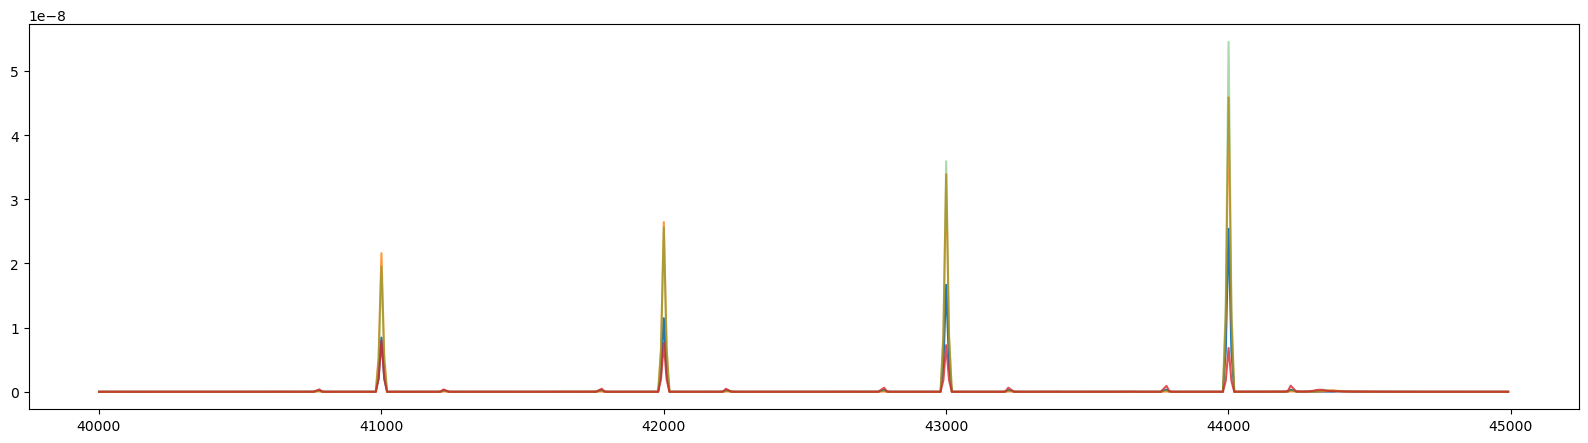

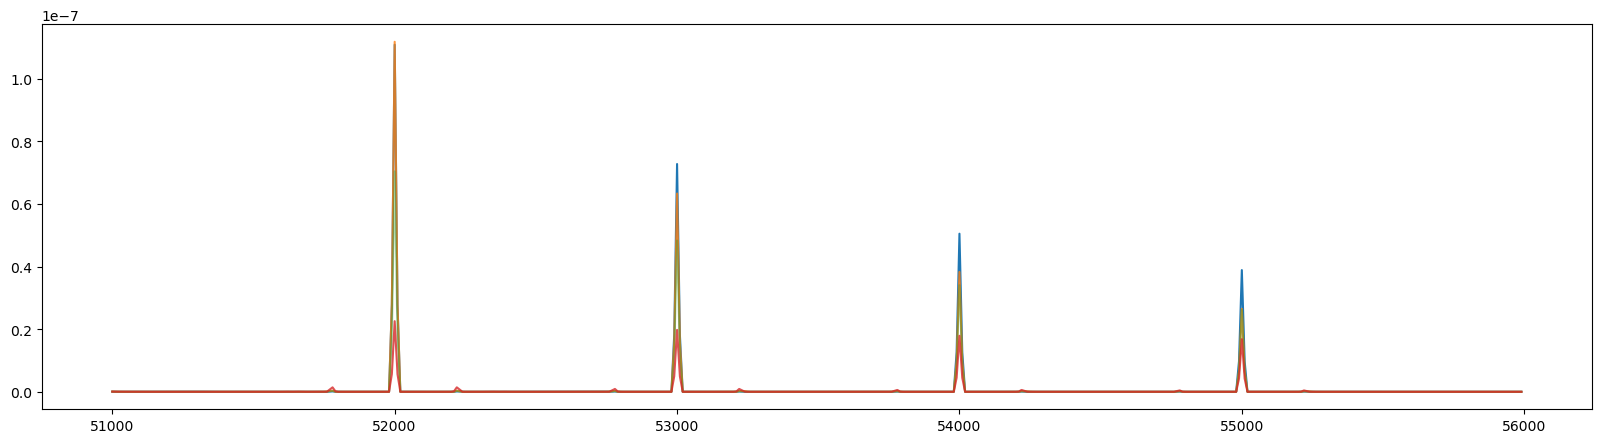

In [154]:
lb = 4000
ub = 4500
plt.figure(figsize = (20, 5))
plt.plot(PSD1[0][lb:ub], PSD1[1][lb:ub])
plt.plot(PSD2[0][lb:ub], PSD2[1][lb:ub], alpha = 0.8)
plt.plot(PSD3[0][lb:ub], PSD3[1][lb:ub], alpha = 0.4)
plt.plot(PSD4[0][lb:ub], PSD4[1][lb:ub], alpha = 0.8)
#plt.yscale('log')
lb = 5100
ub = 5600
plt.figure(figsize = (20, 5))
plt.plot(PSD1[0][lb:ub], PSD1[1][lb:ub])
plt.plot(PSD2[0][lb:ub], PSD2[1][lb:ub], alpha = 0.8)
plt.plot(PSD3[0][lb:ub], PSD3[1][lb:ub], alpha = 0.4)
plt.plot(PSD4[0][lb:ub], PSD4[1][lb:ub], alpha = 0.8)
#plt.yscale('log')


In [155]:
# Minimising residual drive

In [172]:
PSDs = []
Vs = [3.18, 3.19, 3.2, 3.21, 3.22, 3.23]
for V in Vs:
    filename = 'D:/Lab Data/lorentz_force/sphere20250423_2/20250424/Minimising res z drive/'+str(V)+'.mat'
    file = sio.loadmat(filename)
    data = np.transpose(file['D'])[0]
    dt = file['Tinterval'][0][0]
    PSD = scisig.welch(data, fs=1/dt, nperseg=int(0.1/dt))
    PSDs.append(PSD[1])
freqs = PSD[0]

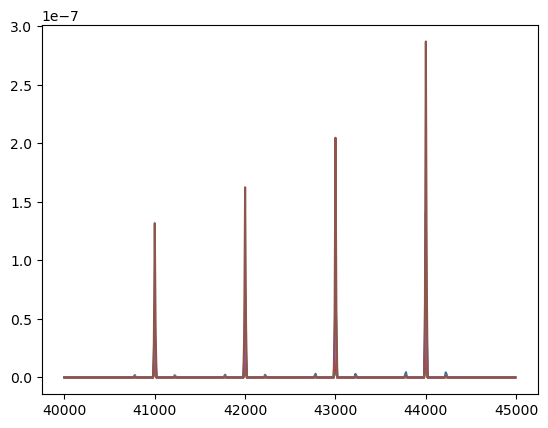

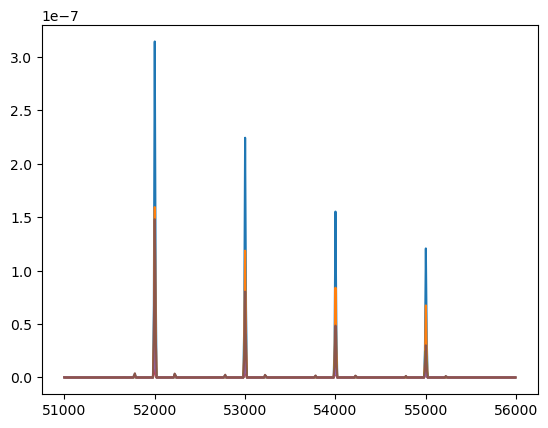

In [180]:
lb = 4000
ub = 4500
for PSD in PSDs[:6]:
    plt.plot(freqs[lb:ub], PSD[lb:ub])

plt.figure()
lb = 5100
ub = 5600
for PSD in PSDs[:6]:
    plt.plot(freqs[lb:ub], PSD[lb:ub])
#plt.yscale('log')

In [ ]:
amps = np.zeros((6, 8))
dfreqs = [4100, 4200, 4300, 4400, 5200, 5300, 5400, 5500]
for n, PSD in enumerate(PSDs):
    for m, freq in enumerate(dfreqs):
        amps[n, m] = PSD[freq]

In [183]:
amps

array([[4.19742179e-08, 5.44787504e-08, 8.49975805e-08, 1.41604232e-07,
        3.14290929e-07, 2.24246691e-07, 1.55169076e-07, 1.20715839e-07],
       [1.51982320e-08, 2.03248547e-08, 3.37482717e-08, 5.93150595e-08,
        1.59409495e-07, 1.18619042e-07, 8.39701002e-08, 6.74089762e-08],
       [6.23636875e-09, 8.08927769e-09, 1.12137810e-08, 1.82286737e-08,
        5.33050262e-08, 4.07299403e-08, 2.97483052e-08, 2.49389558e-08],
       [2.20401102e-08, 2.59320352e-08, 2.89195050e-08, 3.61430068e-08,
        1.57686788e-08, 1.12927685e-08, 8.95263774e-09, 8.28385627e-09],
       [5.94554592e-08, 7.20973645e-08, 8.66384369e-08, 1.16488138e-07,
        4.12717895e-08, 2.01693151e-08, 1.20099024e-08, 7.39300399e-09],
       [1.31740777e-07, 1.62376963e-07, 2.04619610e-07, 2.86775617e-07,
        1.48026302e-07, 8.03313398e-08, 4.84840506e-08, 3.00894349e-08]])

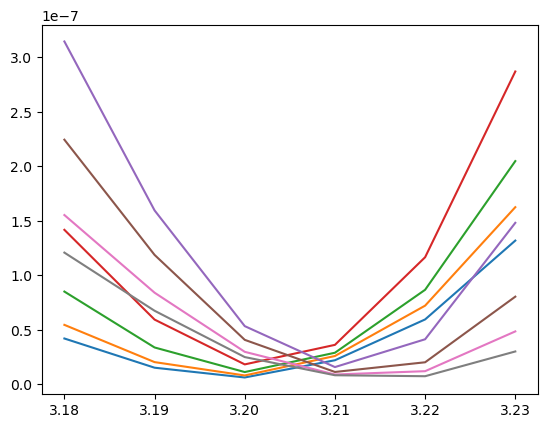

In [186]:
for amp in np.transpose(amps):
    plt.plot(Vs, amp)